<a href="https://colab.research.google.com/github/DaryaPerry1996/LungClassifier/blob/main/lungClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.1 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


In [2]:

#hide
from fastbook import *
from fastai.vision.all import *

In [3]:
# Set your preferred save path in Drive
drive_path = Path("/content/gdrive/MyDrive/Colab Notebooks/LungClassifier")
drive_path.mkdir(parents=True, exist_ok=True)


In [4]:
path=Path('/content/gdrive/MyDrive/Colab Notebooks/LungClassifier/all_data')
path.ls()

(#2) [Path('/content/gdrive/MyDrive/Colab Notebooks/LungClassifier/all_data/NORMAL'),Path('/content/gdrive/MyDrive/Colab Notebooks/LungClassifier/all_data/PNEUMONIA')]

#Image augmentation and resizing methods:

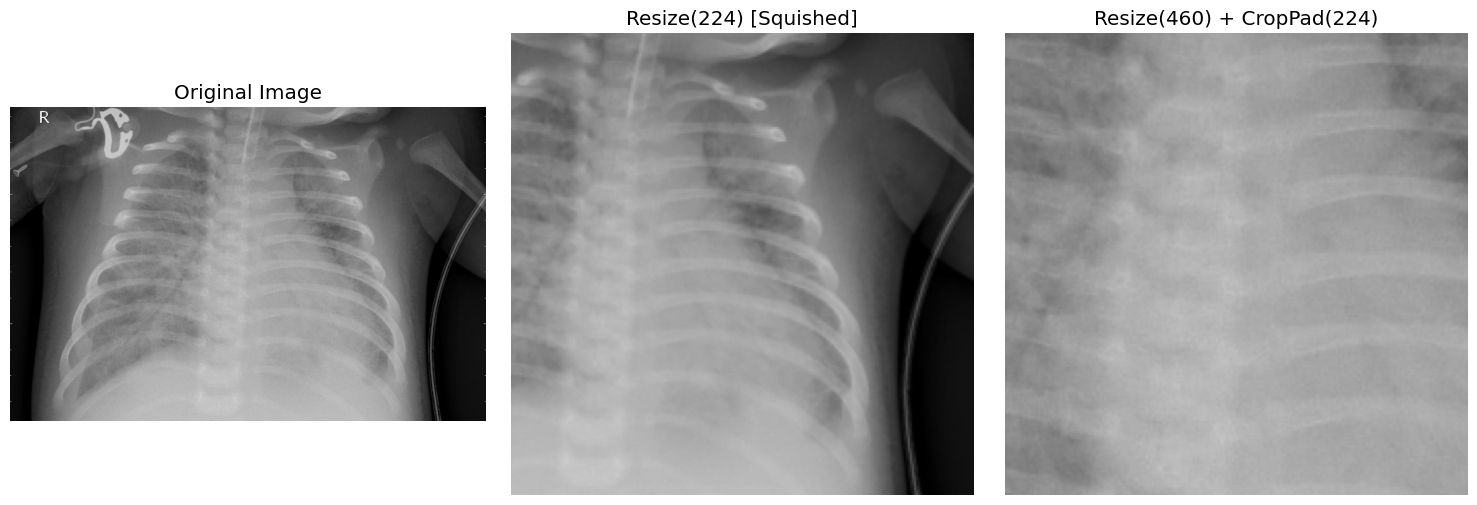

In [ ]:

# import matplotlib.pyplot as plt

# # Replace with your actual path to X-ray images
# sample_path = Path('/content/drive/MyDrive/Colab Notebooks/LungClassifier/all_data/PNEUMONIA')
# sample_image = PILImage.create(get_image_files(sample_path)[0])

# # Apply Resize(224) directly (squish)
# resize_224 = Resize(224)(sample_image)

# # Apply Resize(460) followed by CropPad(224)
# resize_460 = Resize(460)(sample_image)
# croppad_224 = CropPad(224)(resize_460)

# # Plot the original and transformed images
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# axs[0].imshow(sample_image)
# axs[0].set_title("Original Image")
# axs[0].axis('off')

# axs[1].imshow(resize_224)
# axs[1].set_title("Resize(224) [Squished]")
# axs[1].axis('off')

# axs[2].imshow(croppad_224)
# axs[2].set_title("Resize(460) + CropPad(224)")
# axs[2].axis('off')

# plt.tight_layout()
# plt.show()


#Creating DataBlocks and Implementing batch example

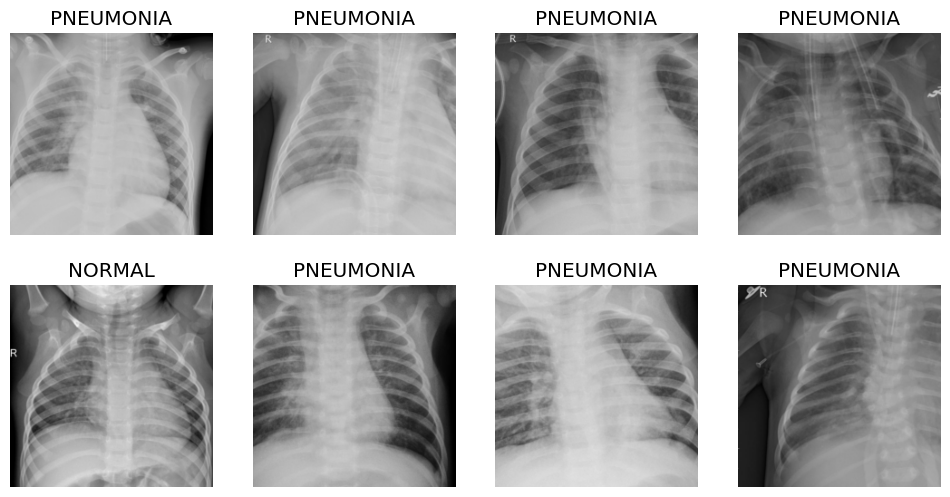

In [5]:
lungs = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=parent_label,
                 item_tfms=Resize(224),
                 #batch_tfms=[CropPad(224), Normalize.from_stats(*imagenet_stats)]
                  )
dls = lungs.dataloaders(path)
dls.show_batch(max_n=8)


In [19]:
#lungs.summary(path)

Setting-up type transforms pipelines
Found 5840 items
2 datasets of sizes 4672,1168
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /content/gdrive/MyDrive/Colab Notebooks/LungClassifier/all_data/PNEUMONIA/person669_virus_1255.jpeg
    applying PILBase.create gives
      PILImage mode=RGB size=929x435
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /content/gdrive/MyDrive/Colab Notebooks/LungClassifier/all_data/PNEUMONIA/person669_virus_1255.jpeg
    applying parent_label gives
      PNEUMONIA
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=929x435, TensorCategory(1))


Found 5840 items
2 datasets of sizes 4672,1168
Setting up Pipeline: PILBase.create
Setting up Pipeline: p

#Finding and Adjusting Learning Rate Metric

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 186MB/s]


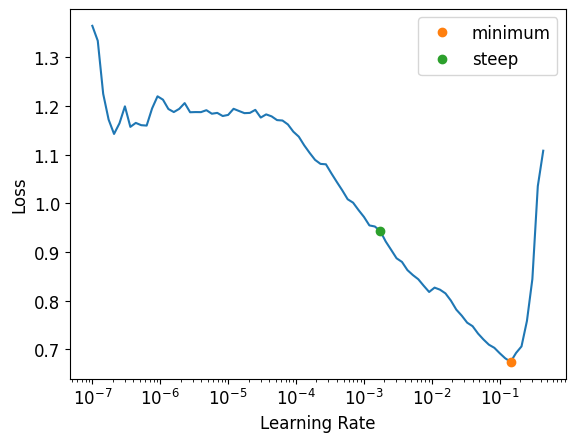

In [6]:

learn = vision_learner(dls, resnet18, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

it seems that a learning rate of 2e-2 or 3e-3 would be appropriete here one orders of magnitude before the minimum when the graphs slope is relativley steep. the default value from the fastai library (which is 1e-3):

#Training the model and Benchmarking

##Resnet34

In [6]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=1e-2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 195MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.376620,0.212495,0.065925,09:37


epoch,train_loss,valid_loss,error_rate,time
0,0.178446,0.148073,0.039384,02:17
1,0.099139,0.090860,0.029966,02:16


In [8]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.440748,0.238122,0.077911,02:09


epoch,train_loss,valid_loss,error_rate,time
0,0.173257,0.158004,0.047945,02:09
1,0.099108,0.096328,0.036815,02:09


In [9]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.489609,0.224839,0.072774,02:09


epoch,train_loss,valid_loss,error_rate,time
0,0.199172,0.158965,0.050514,02:15
1,0.102399,0.132975,0.039384,02:11


##densenet

In [6]:
from torchvision.models import densenet121

learn = cnn_learner(dls, densenet121, metrics=accuracy)


/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 177MB/s]


In [7]:
learn = vision_learner(dls, densenet121, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.441809,0.257887,0.087329,10:36


epoch,train_loss,valid_loss,error_rate,time
0,0.208705,0.196850,0.050514,02:26
1,0.111669,0.180268,0.048801,02:25


##effecientnet

In [8]:
import timm

model_name = 'efficientnet_b1'

In [ ]:
learn = vision_learner(dls, 'efficientnet_b1', metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/31.5M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.475447,0.325389,0.091610,02:11


epoch,train_loss,valid_loss,error_rate,time


In [10]:
learn.export('pneumonia_classifier.pkl')



In [12]:
!cp pneumonia_classifier.pkl "/content/gdrive/MyDrive/Colab Notebooks/LungClassifier"


In [7]:


# Load from where you saved the model
learn = load_learner('/content/gdrive/MyDrive/Colab Notebooks/LungClassifier/pneumonia_classifier.pkl')
interp = ClassificationInterpretation.from_learner(learn)


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


/usr/local/lib/python3.11/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


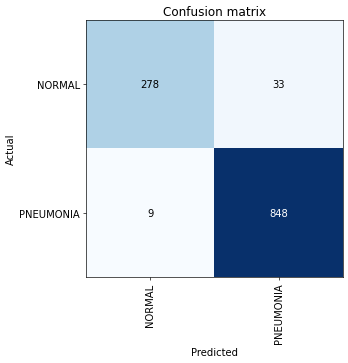

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

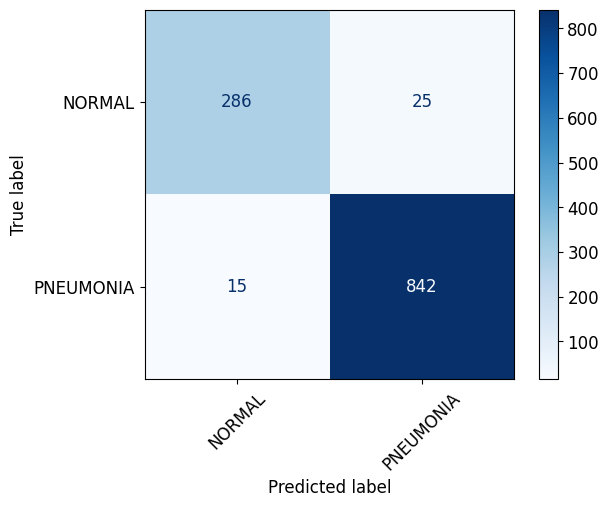

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions and true labels
preds, targs = learn.get_preds(dl=dls.valid)

# Decode manually by taking the index of the highest logit (argmax)
decoded = preds.argmax(dim=1)

# Compute confusion matrix
cm = confusion_matrix(targs, decoded)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=learn.dls.vocab)
disp.plot(xticks_rotation=45, cmap="Blues", values_format='d')
plt.show()


In [12]:
!pip install torchcam --quiet
!pip uninstall numpy
!pip install numpy==1.24.4

activation_map[0] shape before processing: torch.Size([1, 7, 7])
heatmap shape after processing: torch.Size([7, 7])


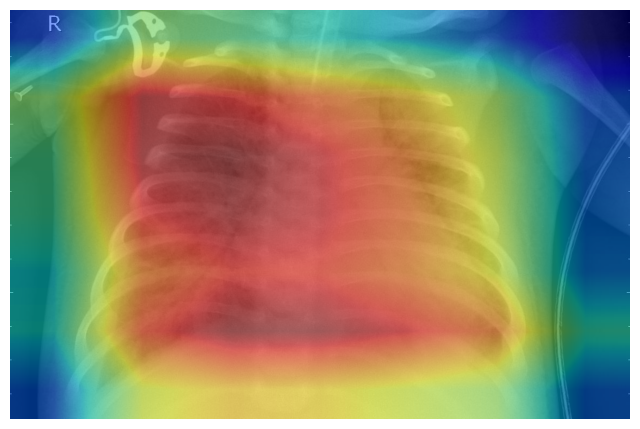

In [40]:
from torchcam.methods import GradCAM
from torchvision.models import resnet34  # Or whatever you're using
from torchvision.transforms.functional import to_pil_image
from fastai.vision.all import *
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Initialize GradCAM on your model layer
cam_extractor = GradCAM(model=learn.model, target_layer="0.7.2")

# Load a PIL image
img = PILImage.create('/content/gdrive/MyDrive/Colab Notebooks/LungClassifier/all_data/PNEUMONIA/person1000_bacteria_2931.jpeg')

# Step 1: Apply after_item transforms (PIL -> tensor on CPU)
x = dls.valid.after_item(img)  # [C,H,W]

# Step 2: Find normalization transform
normalizer = None
for tfm in dls.valid.after_batch:
    if isinstance(tfm, Normalize):
        normalizer = tfm
        break

# Step 3: Move tensor to device and normalize
if normalizer is not None:
    device = normalizer.mean.device
    x = x.to(device)
    x = normalizer(x)
else:
    x = x.cuda()

# Step 4: Add batch dim if missing
if x.dim() == 3:
    inp = x.unsqueeze(0)
else:
    inp = x

# Step 5: Forward pass
out = learn.model(inp)

# Step 6: Get predicted class index
pred_class = out.argmax(dim=1).item()

# Step 7: Get CAM heatmap
activation_map = cam_extractor(pred_class, out)
print(f"activation_map[0] shape before processing: {activation_map[0].shape}")

heatmap = activation_map[0]

# Ensure heatmap is 2D [H, W]
if heatmap.dim() == 3:
    heatmap = heatmap[0]

print(f"heatmap shape after processing: {heatmap.shape}")

# Step 8: Resize heatmap to original image size (H_img, W_img)
heatmap_resized = F.interpolate(
    heatmap.unsqueeze(0).unsqueeze(0),
    size=img.size[::-1],  # (H, W)
    mode='bilinear',
    align_corners=False
)[0, 0]

# Normalize heatmap 0-1
heatmap_resized = (heatmap_resized - heatmap_resized.min()) / (heatmap_resized.max() - heatmap_resized.min())

# Step 9: Plot original image with heatmap overlay
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.imshow(heatmap_resized.cpu().detach().numpy(), alpha=0.5, cmap='jet')
plt.axis('off')
plt.show()
